## Visualização e exploração dos dados do Covid-19 em Portugal

#### Dados extraídos de : 
- https://github.com/dssg-pt/covid19pt-data 
- https://www.dgs.pt/
- https://github.com/CSSEGISandData/COVID-19

## Obrigado pela vossa compilação, assim podemos acompanhar a evolução


In [1]:
#importacao de bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
import pandas as pd
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
import numpy as np

In [2]:
PATH_DATA = "../"

In [3]:
#chamar o ficheiro do tipo csv
df_data = pd.read_csv(f"{PATH_DATA}data.csv")

In [4]:
df_data.tail()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
30,27-03-2020,27-03-2020 00:00,4268,2443,520,1110,30,99,24,21,...,1.0,3.0,1.0,9.0,4.0,14.0,20.0,23.0,27.0,49.0
31,28-03-2020,28-03-2020 00:00,5170,3035,647,1287,34,106,30,31,...,1.0,4.0,1.0,13.0,4.0,17.0,27.0,31.0,35.0,65.0
32,29-03-2020,29-03-2020 00:00,5962,3550,709,1478,41,108,33,43,...,1.0,4.0,1.0,14.0,7.0,20.0,32.0,38.0,43.0,76.0
33,30-03-2020,30-03-2020 00:00,6408,3801,784,1577,45,116,41,44,...,1.0,5.0,1.0,15.0,8.0,23.0,40.0,45.0,52.0,88.0
34,31-03-2020,31-03-2020 00:00,7443,4452,911,1799,50,137,48,46,...,1.0,5.0,1.0,16.0,13.0,25.0,47.0,50.0,64.0,96.0


In [5]:
# Informação sobre os campos do ficheiro csv
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 84 columns):
data                                 35 non-null object
data_dados                           35 non-null object
confirmados                          35 non-null int64
confirmados_arsnorte                 35 non-null int64
confirmados_arscentro                35 non-null int64
confirmados_arslvt                   35 non-null int64
confirmados_arsalentejo              35 non-null int64
confirmados_arsalgarve               35 non-null int64
confirmados_acores                   35 non-null int64
confirmados_madeira                  35 non-null int64
confirmados_estrangeiro              16 non-null float64
confirmados_novos                    35 non-null int64
recuperados                          35 non-null int64
obitos                               35 non-null int64
internados                           27 non-null float64
internados_uci                       18 non-null float64
lab      

In [6]:
#estatistica descritiva dos dados
df_data.describe()

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
count,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,35.000000,16.00000,35.000000,...,8.0,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000
mean,1347.028571,748.457143,160.228571,383.285714,7.342857,28.828571,7.400000,7.200000,9.12500,212.657143,...,1.0,3.62500,0.625000,10.750000,4.625000,15.625000,25.500000,28.500000,32.875000,58.50000
std,2110.822776,1238.477347,259.055534,539.755804,14.375107,40.645154,13.081644,13.581562,5.86373,295.694590,...,0.0,1.06066,0.517549,4.334249,4.533605,7.130167,13.490738,14.784161,19.223776,26.97618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,1.0,2.00000,0.000000,4.000000,0.000000,5.000000,9.000000,12.000000,10.000000,23.00000
25%,11.000000,6.500000,1.000000,3.500000,0.000000,0.000000,0.000000,0.000000,5.00000,2.500000,...,1.0,3.00000,0.000000,7.750000,0.750000,12.250000,15.750000,15.250000,17.500000,38.25000
50%,169.000000,77.000000,8.000000,73.000000,0.000000,7.000000,0.000000,0.000000,9.00000,57.000000,...,1.0,3.50000,1.000000,11.000000,4.000000,15.500000,23.500000,27.000000,31.000000,57.00000
75%,1830.000000,916.000000,209.000000,635.500000,5.000000,38.500000,7.500000,8.000000,11.00000,311.000000,...,1.0,4.25000,1.000000,14.250000,7.250000,20.750000,34.000000,39.750000,45.250000,79.00000
max,7443.000000,4452.000000,911.000000,1799.000000,50.000000,137.000000,48.000000,46.000000,21.00000,1035.000000,...,1.0,5.00000,1.000000,16.000000,13.000000,25.000000,47.000000,50.000000,64.000000,96.00000


In [7]:
data1 = pd.read_csv(f"{PATH_DATA}data.csv", parse_dates=[0], index_col=[0], infer_datetime_format=True)
data1.fillna(value=0).head(5)

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-27,27-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28,28-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,29-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,01-03-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


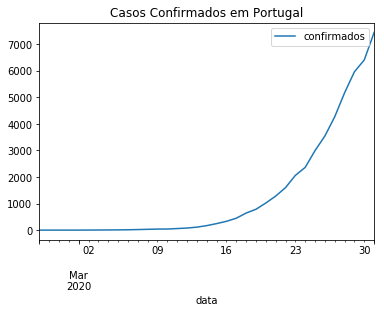

In [8]:
#Evolução do número de casos
data1[['confirmados']].plot(kind='line', title='Casos Confirmados em Portugal')

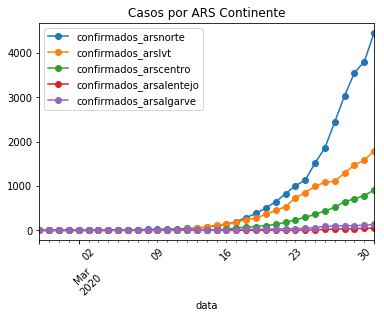

In [9]:
#Evolução do número de casos por ARS
data1[['confirmados_arsnorte', 'confirmados_arslvt', 'confirmados_arscentro', 'confirmados_arsalentejo', 'confirmados_arsalgarve',]].plot(kind='line', title='Casos por ARS Continente', linestyle='-', marker='o', rot=45, fontsize=10)

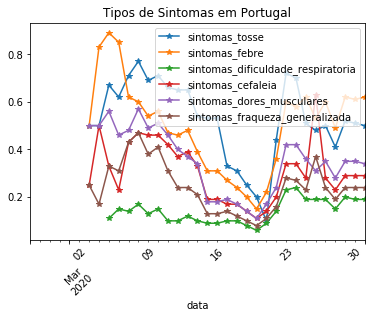

In [10]:
#Tipos de sintomas
data1[['sintomas_tosse' , 'sintomas_febre' , 'sintomas_dificuldade_respiratoria', 'sintomas_cefaleia' , 'sintomas_dores_musculares' , 'sintomas_fraqueza_generalizada']].plot(kind='line', title='Tipos de Sintomas em Portugal', linestyle='-', marker='*', rot=45, fontsize=10)

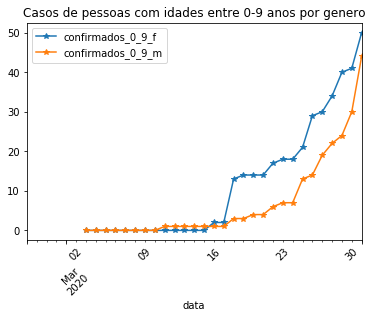

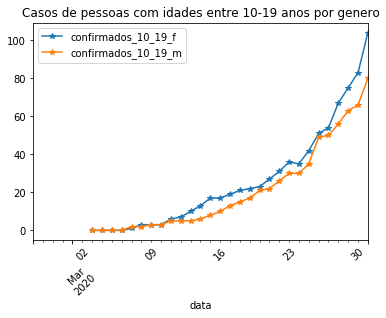

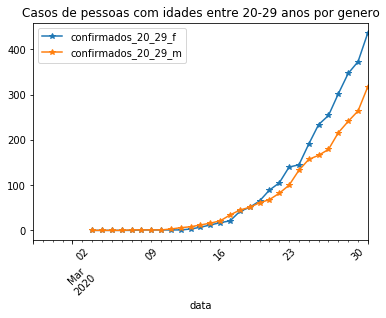

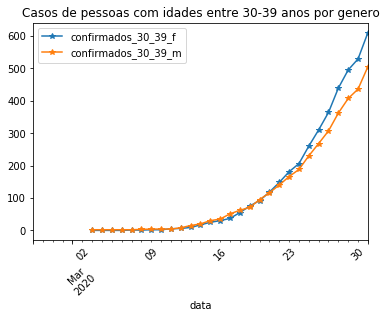

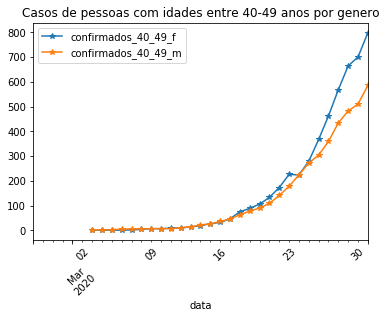

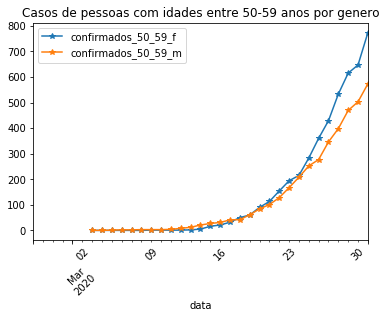

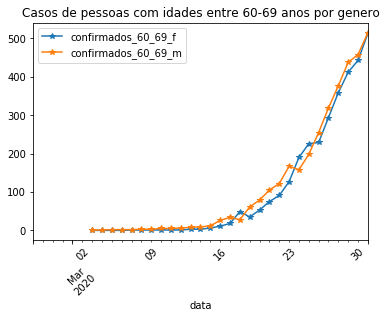

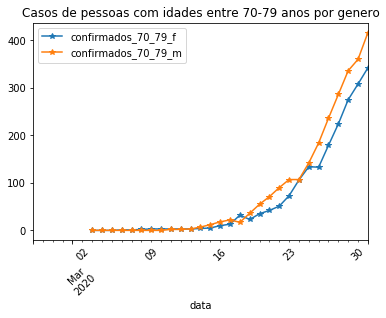

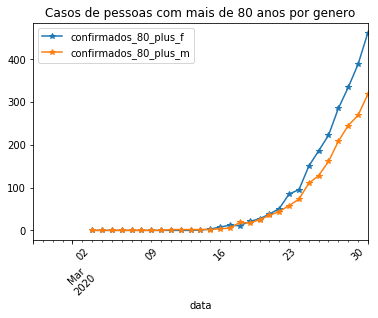

In [11]:
data1[['confirmados_0_9_f' , 'confirmados_0_9_m']].plot(kind='line', title='Casos de pessoas com idades entre 0-9 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_10_19_f' , 'confirmados_10_19_m']].plot(kind='line', title='Casos de pessoas com idades entre 10-19 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_20_29_f' , 'confirmados_20_29_m']].plot(kind='line', title='Casos de pessoas com idades entre 20-29 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_30_39_f' , 'confirmados_30_39_m']].plot(kind='line', title='Casos de pessoas com idades entre 30-39 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_40_49_f' , 'confirmados_40_49_m']].plot(kind='line', title='Casos de pessoas com idades entre 40-49 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_50_59_f' , 'confirmados_50_59_m']].plot(kind='line', title='Casos de pessoas com idades entre 50-59 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_60_69_f' , 'confirmados_60_69_m']].plot(kind='line', title='Casos de pessoas com idades entre 60-69 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_70_79_f' , 'confirmados_70_79_m']].plot(kind='line', title='Casos de pessoas com idades entre 70-79 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_80_plus_f' , 'confirmados_80_plus_m']].plot(kind='line', title='Casos de pessoas com mais de 80 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)


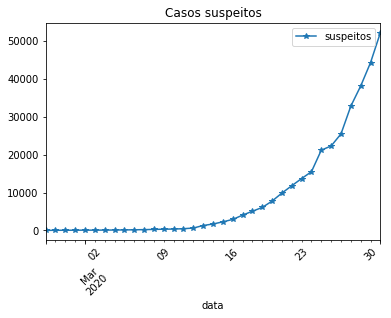

In [12]:
#Evolução dos suspeitos
data1[['suspeitos' ]].plot(kind='line', title='Casos suspeitos', linestyle='-', marker='*', rot=45, fontsize=10)

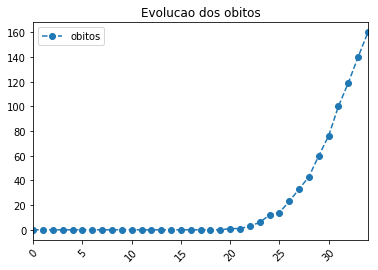

In [13]:
#obitos

df_data[['obitos']].plot(kind='line', title='Evolucao dos obitos', linestyle='--', marker='o', rot=45, fontsize=10)

## Ordinary Least Squares (OLS) -> Estimacao de parametros desconhecidos da regressão linear

In [14]:
confir = np.array([2, 4, 6, 9, 13, 21, 30, 39, 41, 59, 78, 112, 169, 245, 331, 448, 642, 785, 1020, 1280, 1600, 2060, 2362, 2995, 3544, 4268, 5170, 5962, 6408, 7443])

In [15]:
print (confir)

[   2    4    6    9   13   21   30   39   41   59   78  112  169  245
  331  448  642  785 1020 1280 1600 2060 2362 2995 3544 4268 5170 5962
 6408 7443]


In [16]:
x = np.arange(len(confir))
x = add_constant(x)

In [17]:
modelo = OLS(np.log(confir[:29]), x[:29])

In [18]:
resultado = modelo.fit()

In [19]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     1585.
Date:                Wed, 01 Apr 2020   Prob (F-statistic):           1.62e-25
Time:                        01:53:57   Log-Likelihood:                -7.2233
No. Observations:                  29   AIC:                             18.45
Df Residuals:                      27   BIC:                             21.18
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4919      0.116     12.812      0.000       1.253       1.731
x1             0.2843      0.007     39.813      0.000       0.270       0.299
==============================================================================
Omnibus:                        4.707   Durbin-Watson:                   0.172
Prob(Omnibus):                  0.095   Jarque-Bera (JB):                3.691
Skew:                          -0.873   Prob(JB):                        0.158
Kurtosis:                       3.082   Cond. No.                         31.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

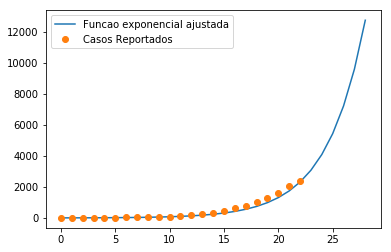

In [20]:
plt.plot(
    np.exp(resultado.predict(x[:29])),
    label="Funcao exponencial ajustada"      
)
plt.plot(confir[:23], "o", label="Casos Reportados")
plt.legend()
plt.show()